In [17]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import trange, tqdm
from itertools import repeat

In [31]:
from Bio.KEGG import REST

# Defina o KEGG ID da via (exemplo: via de câncer em humanos 'hsa05200')
pathway_id = "hsa05224"

# Obter detalhes da via do KEGG
pathway_info = REST.kegg_get(pathway_id).read()

# Inicializar lista para armazenar os genes
genes = []

# Flag para sinalizar quando estamos na seção GENE
in_gene_section = False

# Processar cada linha da resposta do KEGG para extrair os genes
for line in pathway_info.splitlines():
    line = str(line)
    if line.startswith("GENE"):  # Primeira linha que contém "GENE" marca o início da seção
        in_gene_section = True
        line = line.replace("GENE", "    ")
        
    if (in_gene_section and not line[0] == " "):  # Se encontrar outra seção (sem espaço), sair da seção GENE
        in_gene_section = False
        
    if in_gene_section:
        parts = line.split()
        gene_id = parts[0]  # Primeiro item é o ID do gene
        gene_name = " ".join(parts[1:]).split(';')[1]  # O restante é o nome e descrição do gene
        gene_symbol = " ".join(parts[1:]).split(';')[0]
        genes.append((gene_id, gene_symbol, gene_name, ))

# Exibir a lista de genes (ID e nome)
gene_symbols_breast_cancer = []
for gene in genes:
    gene_symbols_breast_cancer.append(gene[1])
    #print(f"ID: {gene[0]}, Symbol: {gene[1]} Nome: {gene[2]}")

print(gene_symbols_breast_cancer)


['ESR1', 'ESR2', 'NCOA1', 'NCOA3', 'FOS', 'JUN', 'SP1', 'CCND1', 'MYC', 'PGR', 'WNT1', 'WNT4', 'TNFSF11', 'ERBB2', 'FGF1', 'FGF2', 'FGF3', 'FGF4', 'FGF17', 'FGF6', 'FGF7', 'FGF8', 'FGF9', 'FGF10', 'FGF16', 'FGF5', 'FGF18', 'FGF20', 'FGF22', 'FGF19', 'FGF21', 'FGF23', 'FGFR1', 'IGF1', 'IGF1R', 'EGF', 'EGFR', 'KIT', 'SHC1', 'SHC2', 'SHC3', 'SHC4', 'GRB2', 'SOS1', 'SOS2', 'HRAS', 'KRAS', 'NRAS', 'ARAF', 'BRAF', 'RAF1', 'MAP2K1', 'MAP2K2', 'MAPK1', 'MAPK3', 'PIK3CA', 'PIK3CD', 'PIK3CB', 'PIK3R1', 'PIK3R2', 'PIK3R3', 'P3R3URF-PIK3R3', 'PTEN', 'AKT1', 'AKT2', 'AKT3', 'MTOR', 'RPS6KB1', 'RPS6KB2', 'JAG1', 'JAG2', 'DLL3', 'DLL1', 'DLL4', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'NOTCH4', 'HES1', 'HES5', 'HEYL', 'HEY1', 'HEY2', 'FLT4', 'CDKN1A', 'NFKB2', 'WNT2', 'WNT2B', 'WNT3', 'WNT3A', 'WNT5A', 'WNT5B', 'WNT6', 'WNT7A', 'WNT7B', 'WNT8A', 'WNT8B', 'WNT9A', 'WNT9B', 'WNT10B', 'WNT10A', 'WNT11', 'WNT16', 'FZD1', 'FZD7', 'FZD2', 'FZD3', 'FZD4', 'FZD5', 'FZD8', 'FZD6', 'FZD10', 'FZD9', 'LRP5', 'LRP6', 'DVL3'

### Gene Symbols to Go Terms

In [3]:
from goatools.anno.gaf_reader import GafReader

# Carregar o arquivo GAF
gaf_fn = "Data/goa_human.gaf"
gaf = GafReader(gaf_fn)

HMS:0:00:17.088218 773,774 annotations READ: Data/goa_human.gaf 


In [4]:
# Função para obter os termos GO de um símbolo de gene
def get_go_terms_from_symbol(symbol):
    go_terms = set()
    
    # Percorre todas as anotações e encontra aquelas que correspondem ao símbolo do gene
    for annotation in gaf.associations:
        if annotation.DB_Symbol == symbol and annotation.NS == 'BP':
            go_terms.add(annotation.GO_ID)
    
    return go_terms

In [34]:
go_terms_breast_cancer = set()
for gene_symbol in tqdm(gene_symbols_breast_cancer):
    for go_term in get_go_terms_from_symbol(gene_symbol):
        go_terms_breast_cancer.add(go_term)
    

  0%|          | 0/148 [00:00<?, ?it/s]

In [6]:
Breast_GSE70947_gene_symbols = pd.read_pickle('./Data/Breast_GSE70947-gene_symbols.pkl')

In [35]:
go_terms_breast_cancer

{'GO:0010595',
 'GO:0048863',
 'GO:2000978',
 'GO:0009410',
 'GO:0097473',
 'GO:0051151',
 'GO:0060667',
 'GO:0032956',
 'GO:0003215',
 'GO:0007283',
 'GO:0043086',
 'GO:0072054',
 'GO:0072656',
 'GO:0098609',
 'GO:0045665',
 'GO:0006687',
 'GO:0003266',
 'GO:0001502',
 'GO:0043616',
 'GO:0003148',
 'GO:0007379',
 'GO:1900746',
 'GO:0071257',
 'GO:0036304',
 'GO:0007399',
 'GO:2001237',
 'GO:2000810',
 'GO:0009303',
 'GO:0010759',
 'GO:0050677',
 'GO:0045588',
 'GO:0042369',
 'GO:0055085',
 'GO:1900034',
 'GO:0061154',
 'GO:0071356',
 'GO:0060546',
 'GO:0042246',
 'GO:0007623',
 'GO:0042472',
 'GO:0001840',
 'GO:0003162',
 'GO:0002352',
 'GO:0051048',
 'GO:0044346',
 'GO:0031175',
 'GO:1904385',
 'GO:0099068',
 'GO:2000573',
 'GO:0030538',
 'GO:0008285',
 'GO:0072148',
 'GO:1904030',
 'GO:0036294',
 'GO:0072006',
 'GO:0090314',
 'GO:0007440',
 'GO:0051090',
 'GO:0060441',
 'GO:0048010',
 'GO:0060842',
 'GO:0097091',
 'GO:0030238',
 'GO:0061029',
 'GO:0045662',
 'GO:1900076',
 'GO:00358

In [22]:
for gene in tqdm(set(list(Breast_GSE70947_gene_symbols['gene_symbol']))):
    Breast_GSE70947_gene_symbols.loc[Breast_GSE70947_gene_symbols['gene_symbol'] == gene, 'GO Term hsa05224'] = str(sorted(list(get_go_terms_from_symbol(gene))))
Breast_GSE70947_gene_symbols['GO Term hsa05224'] = Breast_GSE70947_gene_symbols['GO Term hsa05224'].apply(lambda x: x.replace('[', '').replace(']','').replace("'",'').split(', '))

  0%|          | 0/29536 [00:00<?, ?it/s]

In [ ]:
Breast_GSE70947_gene_symbols['scores'] = Breast_GSE70947_gene_symbols['GO Term'].apply(lambda x: len([item for item in x if item in go_terms])/len(x))

In [37]:
Breast_GSE70947_gene_symbols['scores_breast_cancer_pathways'] = Breast_GSE70947_gene_symbols['GO Term hsa05224'].apply(lambda x: len([item for item in x if item in go_terms_breast_cancer])/len(x))

<Axes: xlabel='scores_breast_cancer_pathways', ylabel='Count'>

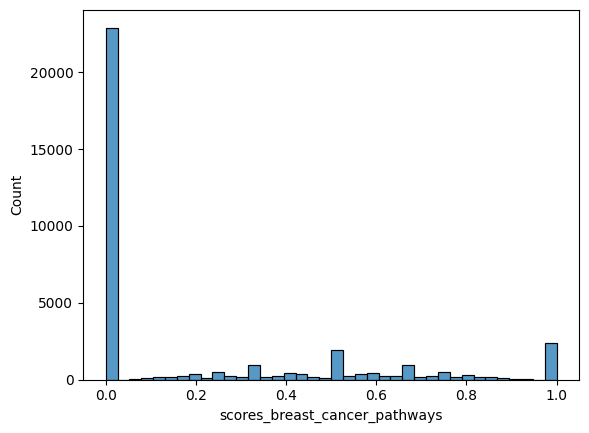

In [38]:
sns.histplot(Breast_GSE70947_gene_symbols['scores_breast_cancer_pathways'])

In [16]:
Breast_GSE70947_gene_symbols.to_pickle('./Data/Breast_GSE70947-gene_symbols.pkl')

In [14]:
# load Gene Ontology
from goatools.base import download_go_basic_obo
from goatools.obo_parser import GODag

fin_dag = download_go_basic_obo("go-basic.obo")
go = GODag(fin_dag, optional_attrs={'relationship'}, load_obsolete=True)

  EXISTS: go-basic.obo
go-basic.obo: fmt(1.2) rel(2024-06-17) 51,502 Terms; optional_attrs(relationship)


In [15]:
go_terms_liver_cancer = list(go_terms_liver_cancer)
for i in tqdm(range(len(go_terms_14520_U133A))):
    for j in range(len(go_terms_liver_cancer)):
        go_terms_values[i,j] = Similarity_of_Two_GOTerms(go_terms_14520_U133A[i], go_terms_liver_cancer[j], go, 'GOGO')
        

  0%|          | 0/9404 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [56]:
for i in trange(len(go_terms_14520_U133A)):
    gen1 = go_terms_14520_U133A[i]
    go_terms_values[i] = pool.starmap(f, zip(repeat(gen1), go_terms_liver_cancer))

  0%|          | 0/9404 [00:00<?, ?it/s]

In [22]:
#go_terms_values.shape
with open('Data/go_terms_14520_133A_liver_cancer.pkl', 'rb') as file:
    go_terms_values = pickle.load(file)

In [17]:
print(go_terms_values)

[[0.      0.1626  0.0824  ... 0.      0.0964  0.04434]
 [0.      0.0455  0.03033 ... 0.      0.03296 0.02242]
 [0.      0.05643 0.04346 ... 0.      0.04993 0.02571]
 ...
 [0.      0.0752  0.2734  ... 0.      0.2051  0.176  ]
 [0.      0.0416  0.08716 ... 0.      0.1076  0.1874 ]
 [0.      0.0412  0.0867  ... 0.      0.10754 0.1846 ]]


In [ ]:
go_terms_values[:,0]

In [23]:
#Globais
INDICES_go_terms_14520_U133A = dict(zip(go_terms_14520_U133A, range(len(go_terms_14520_U133A))))
INDICES_go_terms_liver_cancer = dict(zip(go_terms_liver_cancer, range(len(go_terms_liver_cancer))))

In [24]:
data = pd.read_pickle('Data/data_normalized.pkl')
colunas = list(data.columns)
colunas.remove('samples')
colunas.remove('type')
affymetrix_GO_terms_dict = dict(zip(pd.read_pickle('Data/affymetrix_GO_terms_dict.pkl')['ID'],pd.read_pickle('Data/affymetrix_GO_terms_dict.pkl')['GO term']))

In [40]:
scores_affymetrix_vs_liver_cancer = []
for i in trange(len(colunas)):
    gen1 = affymetrix_GO_terms_dict[colunas[i]]
    gen2 = go_terms_liver_cancer
    if gen1 != [] and gen2 != []:
        scores_affymetrix_vs_liver_cancer.append(Similarity_of_Set_of_GOTerms(gen1, gen2,
                                            method='pre_computed_GOGO',
                                            matrix_similarity = go_terms_values,
                                            go_labels_1 = INDICES_go_terms_14520_U133A,
                                            go_labels_2 = INDICES_go_terms_liver_cancer))
    else:
        scores_affymetrix_vs_liver_cancer.append(0)



  0%|          | 0/22277 [00:00<?, ?it/s]

In [7]:
INDICES_go_terms_liver_cancer['GO:0098680']

NameError: name 'INDICES_go_terms_liver_cancer' is not defined

In [41]:
scores_affymetrix_vs_liver_cancer

[0.284,
 0.132,
 0.167,
 0.353,
 0.219,
 0.176,
 0.376,
 0.087,
 0.324,
 0.138,
 0.316,
 0.302,
 0.127,
 0.415,
 0.334,
 0.249,
 0.315,
 0.192,
 0.098,
 0.32,
 0.086,
 0.184,
 0.15,
 0.15,
 0.229,
 0.149,
 0.308,
 0.125,
 0.198,
 0.198,
 0.167,
 0.19,
 0.15,
 0.15,
 0.205,
 0.258,
 0.145,
 0.412,
 0.172,
 0.157,
 0.174,
 0.302,
 0.15,
 0.15,
 0.168,
 0.175,
 0.15,
 0.085,
 0,
 0.15,
 0.112,
 0.15,
 0.15,
 0.3,
 0.173,
 0.163,
 0.19,
 0.175,
 0.222,
 0.241,
 0.259,
 0.186,
 0.171,
 0.119,
 0.159,
 0.178,
 0.261,
 0.281,
 0.22,
 0.172,
 0.107,
 0.195,
 0.177,
 0,
 0.349,
 0.174,
 0.173,
 0.213,
 0.153,
 0.42,
 0.184,
 0.173,
 0.157,
 0.271,
 0.296,
 0.228,
 0.166,
 0.133,
 0.109,
 0.146,
 0.091,
 0.118,
 0.086,
 0.203,
 0.163,
 0.14,
 0.097,
 0.156,
 0.14,
 0.14,
 0.27,
 0.233,
 0.164,
 0.273,
 0,
 0.206,
 0.136,
 0.218,
 0.15,
 0.15,
 0.215,
 0.162,
 0.15,
 0.221,
 0.181,
 0.193,
 0.17,
 0.233,
 0.132,
 0.228,
 0.168,
 0.168,
 0.148,
 0.148,
 0.148,
 0.233,
 0.233,
 0.206,
 0.212,
 0.38

In [32]:
import seaborn as sns

<Axes: ylabel='Count'>

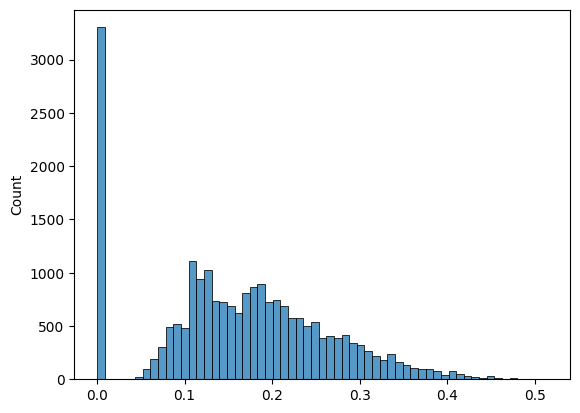

In [42]:
sns.histplot(x = scores_affymetrix_vs_liver_cancer)

In [44]:
with open('Data/scores_affymetrix_vs_liver_cancer.pkl', 'wb') as file:
    pickle.dump(scores_affymetrix_vs_liver_cancer, file)

In [3]:
with open('Data/scores_affymetrix_vs_liver_cancer.pkl', 'rb') as file:
    scores_affymetrix_vs_liver_cancer = pickle.load(file)

In [34]:
go_completness = []
for affymetrix in tqdm(affymetrix_GO_terms_dict.keys()):
    go_count = 0
    for go_term in affymetrix_GO_terms_dict[affymetrix]:
        if go_term in go_terms_liver_cancer:
            go_count += 1
    try:
        go_completness.append(go_count/len(affymetrix_GO_terms_dict[affymetrix]))
    except:
        go_completness.append(0)

  0%|          | 0/22277 [00:00<?, ?it/s]

<Axes: ylabel='Count'>

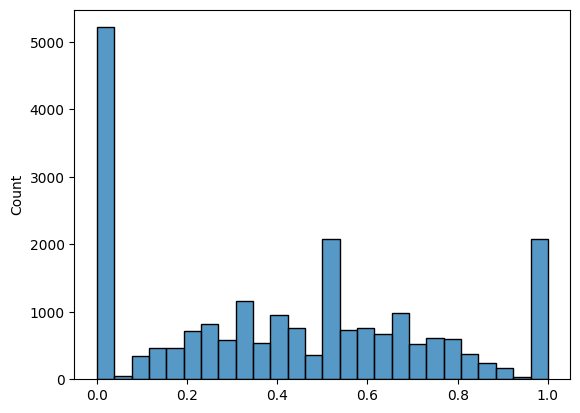

In [35]:
sns.histplot(x = go_completness)

In [36]:
with open('Data/go_completness_liver_cancer.pkl', 'wb') as file:
    pickle.dump(go_completness, file)